# Flu Shot Learning: Predict H1N1 & Seasonal Flu Vaccines

## Data Exploration

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import os 
from os.path import curdir
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import miceforest as mf
import re
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
# Assign data path
training_features_path = os.path.join(curdir, 'training_set_features.csv')
training_labels_path = os.path.join(curdir, 'training_set_labels.csv')
test_path = os.path.join(curdir, 'test_set_features.csv')

In [4]:
# Import features training dataset
features = pd.read_csv('training_set_features.csv', index_col='respondent_id')

# Import labels training dataset
labels = pd.read_csv('training_set_labels.csv', index_col='respondent_id')

In [5]:
# Join two datasets
combined_training = features.join(labels)

# Checking number of rows
print('Number of Data in the Training Combined Dataset',combined_training.shape)

# Checking first 5 data from combined dataset
combined_training.head()

Number of Data in the Training Combined Dataset (26707, 37)


,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


In [6]:
# Check first 10 data in combined training dataset
combined_training.head(10)

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0
5,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,Own,Employed,atmpeygn,"MSA, Principle City",2.0,3.0,saaquncn,vlluhbov,0,0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",0.0,0.0,xicduogh,xtkaffoo,0,0
7,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,Own,Employed,bhuqouqj,Non-MSA,2.0,0.0,pxcmvdjn,xqwwgdyp,1,1
8,0.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,Own,Employed,bhuqouqj,"MSA, Not Principle City",1.0,0.0,xicduogh,ccgxvspp,0,0


In [7]:
# Checking for percentage of null values in the combined training dataset
combined_training.isna().sum()/len(features.index)*100

h1n1_concern                    0.344479
h1n1_knowledge                  0.434343
behavioral_antiviral_meds       0.265848
behavioral_avoidance            0.778822
behavioral_face_mask            0.071142
behavioral_wash_hands           0.157262
behavioral_large_gatherings     0.325757
behavioral_outside_home         0.307036
behavioral_touch_face           0.479275
doctor_recc_h1n1                8.087767
doctor_recc_seasonal            8.087767
chronic_med_condition           3.635751
child_under_6_months            3.070356
health_worker                   3.010447
health_insurance               45.957989
opinion_h1n1_vacc_effective     1.464036
opinion_h1n1_risk               1.452803
opinion_h1n1_sick_from_vacc     1.479013
opinion_seas_vacc_effective     1.729884
opinion_seas_risk               1.924589
opinion_seas_sick_from_vacc     2.010709
age_group                       0.000000
education                       5.268282
race                            0.000000
sex             

In [8]:
# Check for data description
combined_training.describe()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,h1n1_vaccine,seasonal_vaccine
count,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,24547.000000,...,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000,26707.000000,26707.000000
mean,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,0.220312,...,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583,0.212454,0.465608
std,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,0.414466,...,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173,0.409052,0.498825
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,...,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,0.000000,...,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
75%,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,0.000000,...,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000,0.000000,1.000000
max,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000,1.000000,1.000000


In [9]:
# Check datatype of each column
combined_training.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 26615 non-null  float64
 1   h1n1_knowledge               26591 non-null  float64
 2   behavioral_antiviral_meds    26636 non-null  float64
 3   behavioral_avoidance         26499 non-null  float64
 4   behavioral_face_mask         26688 non-null  float64
 5   behavioral_wash_hands        26665 non-null  float64
 6   behavioral_large_gatherings  26620 non-null  float64
 7   behavioral_outside_home      26625 non-null  float64
 8   behavioral_touch_face        26579 non-null  float64
 9   doctor_recc_h1n1             24547 non-null  float64
 10  doctor_recc_seasonal         24547 non-null  float64
 11  chronic_med_condition        25736 non-null  float64
 12  child_under_6_months         25887 non-null  float64
 13  health_worker   

## Preprocessing train dataset

In [10]:
# create dummy variables for data features
features_with_dummies = pd.get_dummies(combined_training, prefix_sep='_', drop_first=True)
features_with_dummies.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,employment_occupation_qxajmpny,employment_occupation_rcertsgn,employment_occupation_tfqavkke,employment_occupation_ukymxvdu,employment_occupation_uqqtjvyb,employment_occupation_vlluhbov,employment_occupation_xgwztkwe,employment_occupation_xqwwgdyp,employment_occupation_xtkaffoo,employment_occupation_xzmlyyjv
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0,0,0,0,0,0,1,0,0,0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,0,0,0,0,0,0,0,0,1,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
# Imputing missing data with mice method
imputer = IterativeImputer(random_state=100, max_iter=10)
imputer.fit(features_with_dummies)
features_with_dummies_imputed = imputer.transform(features_with_dummies)

In [12]:
# Convert imputed data to the dataframe
features_imputed = pd.DataFrame(features_with_dummies_imputed, columns = features_with_dummies.columns)

In [13]:
# checking for any null values in the imputed features
features_imputed.isna().sum()

h1n1_concern                      0
h1n1_knowledge                    0
behavioral_antiviral_meds         0
behavioral_avoidance              0
behavioral_face_mask              0
                                 ..
employment_occupation_vlluhbov    0
employment_occupation_xgwztkwe    0
employment_occupation_xqwwgdyp    0
employment_occupation_xtkaffoo    0
employment_occupation_xzmlyyjv    0
Length: 95, dtype: int64

## Split train and evaluation data

In [14]:
# Separate features and labels
features = features_imputed.drop(['h1n1_vaccine', 'seasonal_vaccine'], axis=1)
labels = features_imputed[['h1n1_vaccine', 'seasonal_vaccine']]

# Split into train and validate sets 
X_train, X_eval, y_train, y_eval = train_test_split(features, labels, test_size=0.3, stratify=labels)

In [15]:
X_train.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,employment_occupation_qxajmpny,employment_occupation_rcertsgn,employment_occupation_tfqavkke,employment_occupation_ukymxvdu,employment_occupation_uqqtjvyb,employment_occupation_vlluhbov,employment_occupation_xgwztkwe,employment_occupation_xqwwgdyp,employment_occupation_xtkaffoo,employment_occupation_xzmlyyjv
7450,2.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17430,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7570,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1146,2.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13967,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


## Create Random Forest model

In [16]:
# Fit model on the preprocessed data
rf = RandomForestClassifier()

In [17]:
# Define the hyperparameter distribution
param_dist = {'n_estimators': [100, 200, 300], 
              'max_depth': [4, 7, 9]}

# Initialize randomized search object
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, cv=10, scoring='roc_auc', refit=True, n_iter=100, random_state=42)

# Fit the Randomized Search object to the data
random_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters: ", random_search.best_params_)

C:\Users\sk-25\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 9 is smaller than n_iter=100. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Hyperparameters:  {'n_estimators': 300, 'max_depth': 9}


In [18]:
# Apply best hyperparamters
best_rf = RandomForestClassifier(n_estimators=300, max_depth=9)
best_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=9, n_estimators=300)

## Apply same preprocessing on evaluation dataset

To ensure the same dummy columns are created for both the training and evaluation sets, combine the training and evaluation sets and then resplit them after create dummy variables.

In [21]:
# Combine the training and evaluation sets
combined = pd.concat([X_train, X_eval])

# Create dummy variables
combined_with_dummies = pd.get_dummies(combined, prefix_sep='_', drop_first=True)

# Split them back into training and evaluation sets
X_train = combined_with_dummies.loc[X_train.index]
X_eval = combined_with_dummies.loc[X_eval.index]

In [24]:
# Fit the imputer on the training data only
imputer.fit(X_train)

# Transform the training data
X_train_imputed = imputer.transform(X_train)

# Transform the evaluation data
X_eval_imputed = imputer.transform(X_eval)

In [25]:
# Create a dataframe with imputated data
df_X_eval_imputed = pd.DataFrame(X_eval_imputed, columns = X_eval.columns)

In [26]:
# Checking for any null values in the imputed features
df_X_eval_imputed.isna().sum()

h1n1_concern                      0
h1n1_knowledge                    0
behavioral_antiviral_meds         0
behavioral_avoidance              0
behavioral_face_mask              0
                                 ..
employment_occupation_vlluhbov    0
employment_occupation_xgwztkwe    0
employment_occupation_xqwwgdyp    0
employment_occupation_xtkaffoo    0
employment_occupation_xzmlyyjv    0
Length: 93, dtype: int64

## Generate predictions with Validation Data

In [28]:
# generate vaccine predictions
y_eval_proba = best_rf.predict_proba(df_X_eval_imputed)
y_eval_proba

[array([[0.85361366, 0.14638634],
        [0.94392955, 0.05607045],
        [0.56801459, 0.43198541],
        ...,
        [0.92076094, 0.07923906],
        [0.89999333, 0.10000667],
        [0.94836252, 0.05163748]]),
 array([[0.67772505, 0.32227495],
        [0.82963586, 0.17036414],
        [0.30343292, 0.69656708],
        ...,
        [0.73544824, 0.26455176],
        [0.69798681, 0.30201319],
        [0.88393484, 0.11606516]])]

In [29]:
# Seperate predicted probabilities into h1n1 and seasonal dataframes
y_eval_proba_h1n1 = pd.DataFrame(y_eval_proba[0][:,1], columns=['h1n1_vaccine_proba'])
y_eval_proba_seasonal = pd.DataFrame(y_eval_proba[1][:,1], columns=['seasonal_vaccine_proba'])

## Evaluating Model with Validation Data

In [30]:
# Import libraries for roc curve and visualization
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

In [31]:
# Calculate ROC curve and ROC AUC score for h1n1_vaccine
fpr, tpr, thresholds = roc_curve(y_eval['h1n1_vaccine'], y_eval_proba_h1n1)
roc_auc_h1n1 = roc_auc_score(y_eval['h1n1_vaccine'], y_eval_proba_h1n1)
roc_auc_h1n1

0.8554553154630313

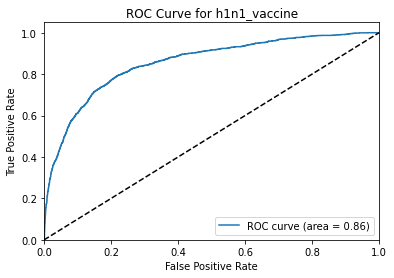

In [32]:
# Plot ROC curve for h1n1_vaccine
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc_h1n1)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for h1n1_vaccine')
plt.legend(loc="lower right")
plt.show()

In [33]:
# Calculate ROC curve and ROC AUC score for seasonal vaccine
fpr, tpr, thresholds = roc_curve(y_eval['seasonal_vaccine'], y_eval_proba_seasonal)
roc_auc_seasonal = roc_auc_score(y_eval['seasonal_vaccine'], y_eval_proba_seasonal)
roc_auc_seasonal

0.8765164330662559

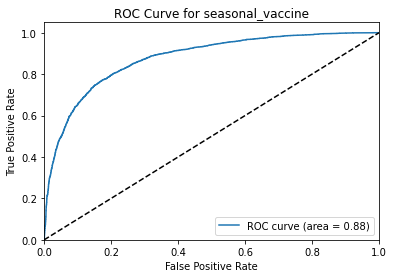

In [34]:
# Plot ROC curve for seasonal vaccine
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc_seasonal)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for seasonal_vaccine')
plt.legend(loc="lower right")
plt.show()

In [35]:
# Calculate average ROC AUC score
average_roc_auc = (roc_auc_h1n1 + roc_auc_seasonal) / 2

# Print the average ROC AUC score
print("Average ROC AUC Score:", average_roc_auc)

Average ROC AUC Score: 0.8659858742646436


## Generate predictions on Test Data

In [36]:
# Load test dataset
X_test = pd.read_csv('test_set_features.csv', index_col = 'respondent_id')

In [37]:
# Create dummy variables for test data features
X_test_dummies = pd.get_dummies(X_test, prefix_sep='_', drop_first=True)

numeric_test = pd.DataFrame(scaler.transform(test[test_numeric_features]), columns=test_numeric_features)
numeric_test = pd.DataFrame(numeric_imputer.transform(numeric_test), columns=test_numeric_features)
categorical_test = pd.DataFrame(categorical_encoder.transform(test[test_categorical_features]).toarray())
test = pd.concat([numeric_test, categorical_test], axis=1)

In [38]:
# Imputing missing values in test features
X_test_imputed = imputer.transform(X_test_dummies)

In [39]:
# covert imputed data from array to data frame
df_X_test_imputed = pd.DataFrame(X_test_imputed, columns = X_test_dummies.columns)

In [41]:
# generate vaccine predictions from test features
y_test_proba = best_rf.predict_proba(df_X_test_imputed)
y_test_proba

[array([[0.8051456 , 0.1948544 ],
        [0.95210356, 0.04789644],
        [0.74361276, 0.25638724],
        ...,
        [0.86595825, 0.13404175],
        [0.870848  , 0.129152  ],
        [0.57172397, 0.42827603]]),
 array([[0.60407079, 0.39592921],
        [0.89290091, 0.10709909],
        [0.47190433, 0.52809567],
        ...,
        [0.64849684, 0.35150316],
        [0.61358465, 0.38641535],
        [0.38352403, 0.61647597]])]

In [42]:
# Create submission file
submission = pd.read_csv('submission_format.csv', index_col="respondent_id")

In [46]:
# Make sure we have the rows in the same order
np.testing.assert_array_equal(X_test.index.values, submission.index.values)

# assign predicted probabilities to submission dataframe
submission["h1n1_vaccine"] = y_test_proba[0][:,1]
submission["seasonal_vaccine"] = y_test_proba[1][:,1]
submission.head()

,h1n1_vaccine,seasonal_vaccine
respondent_id,,
26707,0.194854,0.395929
26708,0.047896,0.107099
26709,0.256387,0.528096
26710,0.431251,0.760394
26711,0.324994,0.565720


In [47]:
submission.to_csv('submission20240425_RF.csv', index=True)